In [12]:
import pandas as pd
import numpy as np
archivo_csv = 'datos_temp_seca.csv'
datos_csv = pd.read_csv(archivo_csv)
df = pd.DataFrame(datos_csv)
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-01 07:00,19.4,50,NaN,900
1,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-01 13:00,26.6,50,NaN,900
2,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-01 19:00,23.6,50,NaN,900
3,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-02 07:00,19.6,50,NaN,900
4,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-02 13:00,27.0,50,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36473,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-30 13:00,26.6,50,NaN,900
36474,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-30 19:00,25.7,50,NaN,900
36475,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-31 07:00,19.8,50,NaN,900
36476,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-31 13:00,26.8,50,NaN,900


In [22]:
fields = ['Fecha', 'Valor']
ndf = df[fields].copy()
ndf['Fecha'] = pd.to_datetime(ndf['Fecha'])
ndf = ndf[ndf['Fecha'].dt.year >= 2015]
ndf

,Fecha,Valor
31934,2015-01-01 07:00:00,19.8
31935,2015-01-01 13:00:00,27.8
31936,2015-01-01 19:00:00,24.2
31937,2015-01-02 07:00:00,18.2
31938,2015-01-02 13:00:00,28.0
...,...,...
36473,2020-01-30 13:00:00,26.6
36474,2020-01-30 19:00:00,25.7
36475,2020-01-31 07:00:00,19.8
36476,2020-01-31 13:00:00,26.8


In [23]:
result = []
TA = []
año=''
mes=''
dia=''
suma = 0
count=0

for a in range(2015,2023,1):
    for m in range(1,13,1):
        for d in range(1,32,1):
            count=0
            suma=0
            for h in range(0,24,1):
                datos = ndf[ndf['Fecha']==f'{a}-{m}-{d} {h}:00:00']
                datos = np.array(datos)
                if datos.size != 0:
                    # print(datos)
                    año = datos[0][0].year
                    mes = datos[0][0].month
                    dia = datos[0][0].day
                    if datos[0][1] > 0:
                        count+=1
                    suma+=datos[0][1]
                else:
                    pass
            TA = [año,mes,dia,count,suma]
            # print(TA)
            if TA[3]>0:
                result.append([TA[4]//TA[3],TA[3],f'{TA[0]}-{TA[1]}-{TA[2]}'])


result = np.array(result)
print(result)

[['23.0' '3' '2015-1-1']
 ['23.0' '3' '2015-1-2']
 ['23.0' '3' '2015-1-3']
 ...
 ['23.0' '3' '2020-1-29']
 ['23.0' '3' '2020-1-30']
 ['23.0' '3' '2020-1-31']]


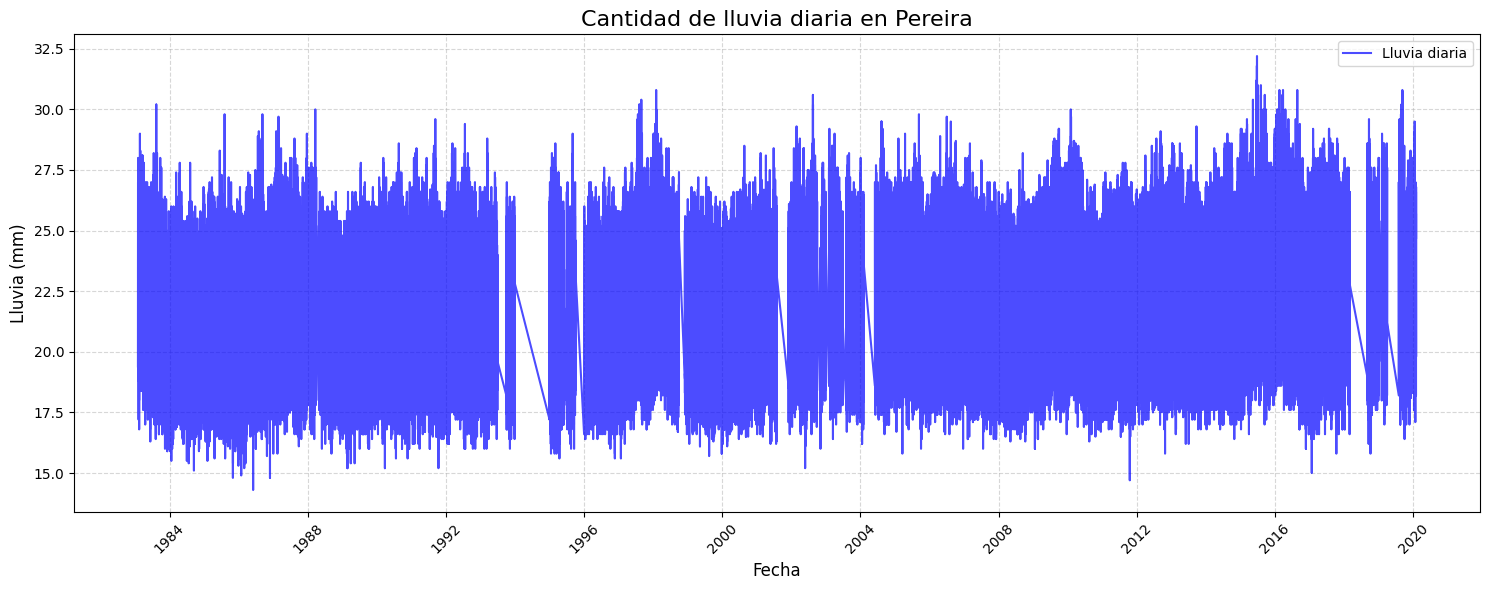

In [24]:
import matplotlib.pyplot as plt
# Gráfico de línea
plt.figure(figsize=(15, 6))
plt.plot(new_df['Fecha'], new_df['Valor'], label='Lluvia diaria', color='blue', alpha=0.7)
plt.title('Cantidad de lluvia diaria en Pereira', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

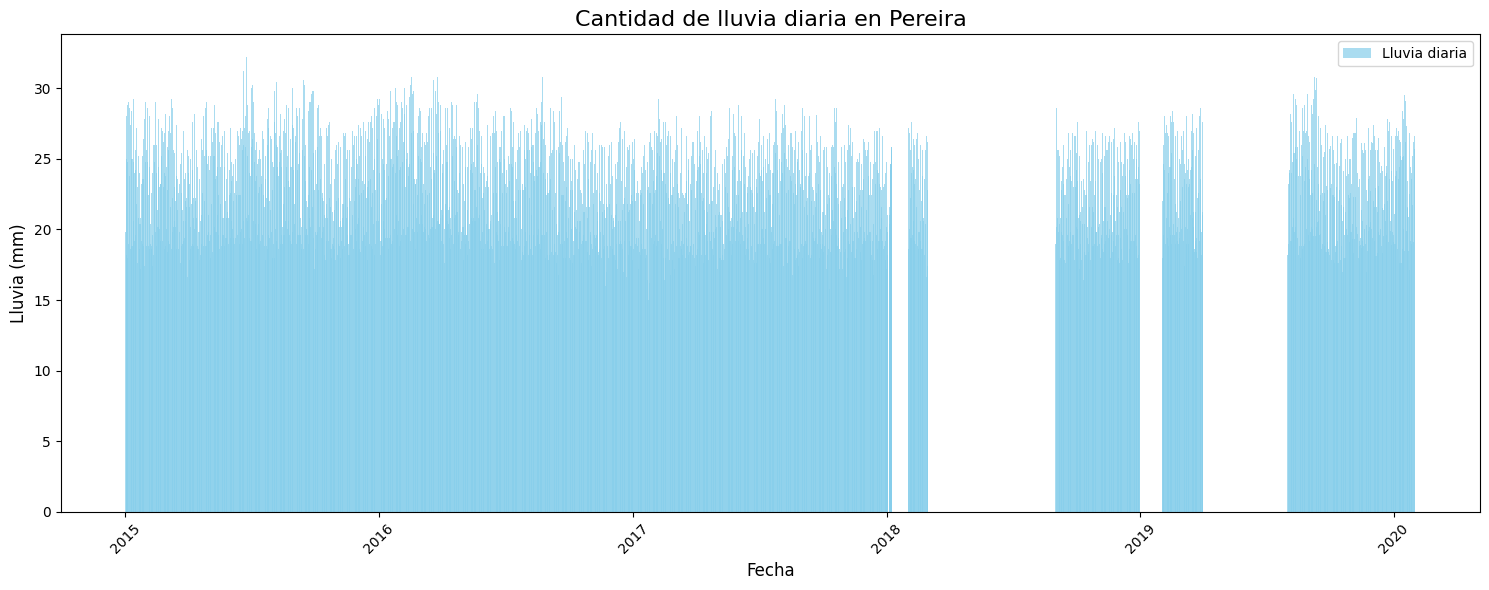

In [27]:
# Gráfico de barras (opcional para comparación)
plt.figure(figsize=(15, 6))
plt.bar(ndf['Fecha'], ndf['Valor'], color='skyblue', alpha=0.7, label='Lluvia diaria')
plt.title('Cantidad de lluvia diaria en Pereira', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

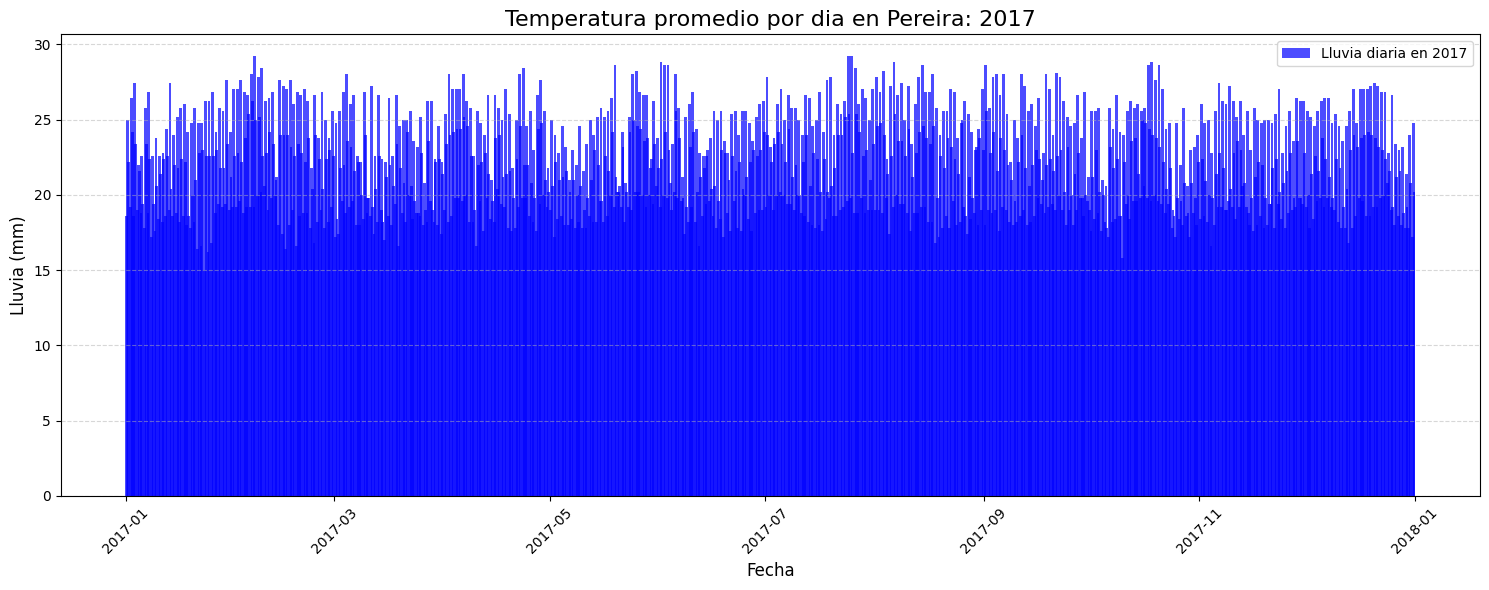

In [30]:
# Filtrar por un año específico (ejemplo: 2018)
year = 2017
filtered_df = ndf[ndf['Fecha'].apply(lambda x: x.year) == year]

# Graficar en barras
plt.figure(figsize=(15, 6))
plt.bar(filtered_df['Fecha'], filtered_df['Valor'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
plt.title(f'Temperatura promedio por dia en Pereira: {year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

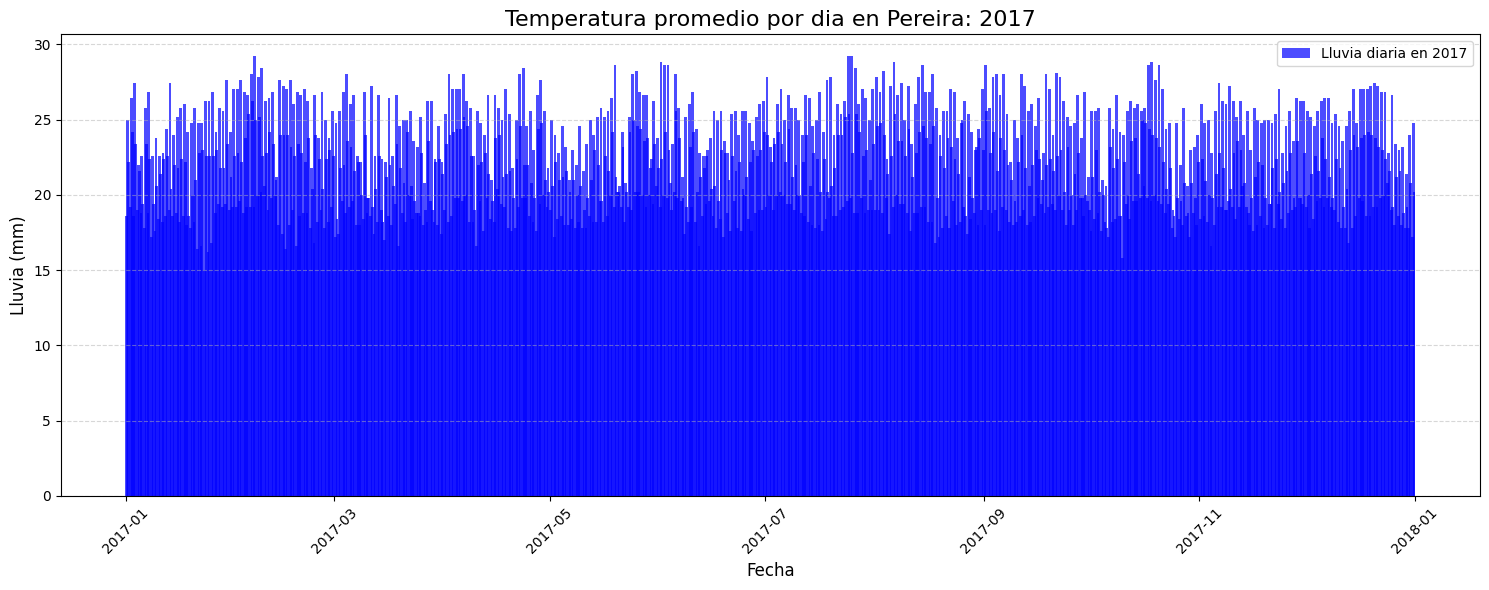

In [34]:
year = 2017
filtered_df = ndf[ndf['Fecha'].apply(lambda x: x.year) == year]

# Graficar en barras
plt.figure(figsize=(15, 6))
plt.bar(filtered_df['Fecha'], filtered_df['Valor'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
# plt.plot(filtered_df['Fecha'], filtered_df['Valor'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
plt.title(f'Temperatura promedio por dia en Pereira: {year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

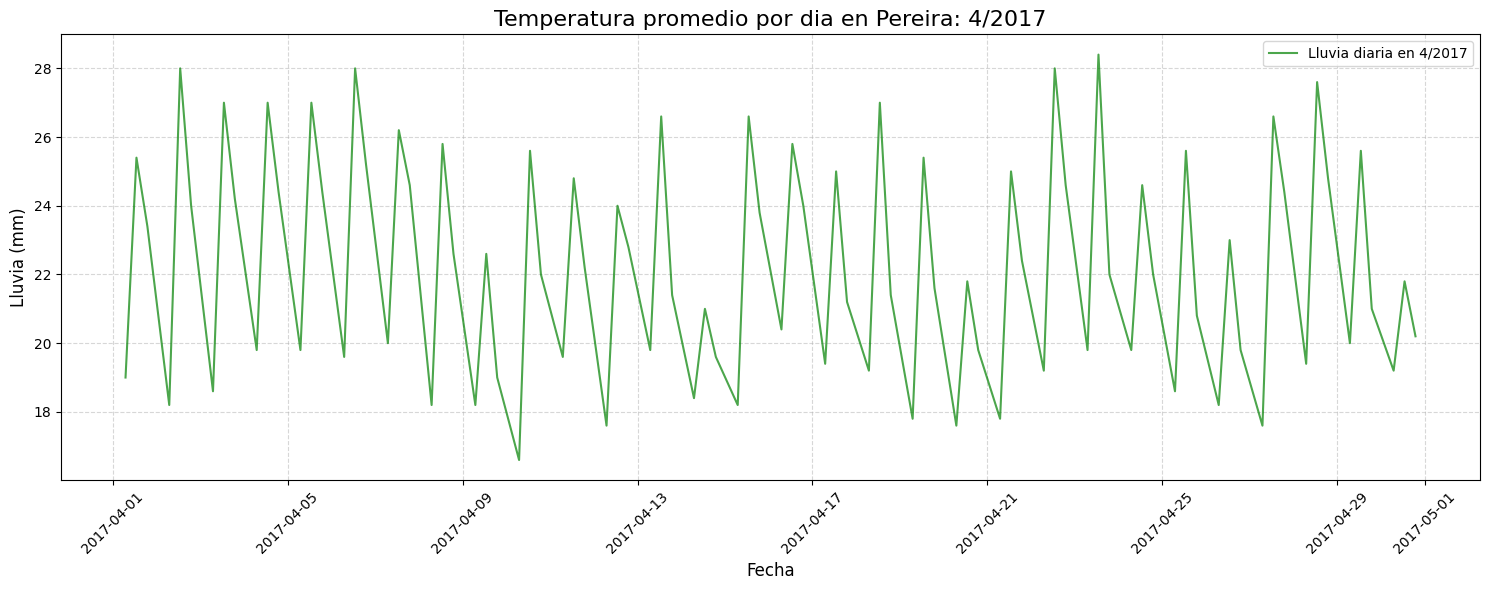

In [37]:
# Filtrar por año y mes específicos (ejemplo: agosto de 2018)
year = 2017
month = 4
filtered_df = ndf[(ndf['Fecha'].apply(lambda x: x.year) == year) & (ndf['Fecha'].apply(lambda x: x.month) == month)]

# Graficar
plt.figure(figsize=(15, 6))
# plt.bar(filtered_df['Fecha'], filtered_df['Valor'], label=f'Lluvia diaria en {month}/{year}', color='green', alpha=0.7)
plt.plot(filtered_df['Fecha'], filtered_df['Valor'], label=f'Lluvia diaria en {month}/{year}', color='green', alpha=0.7)
plt.title(f'Temperatura promedio por dia en Pereira: {month}/{year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()